In [1]:
# Import all the required libraries
import sqlite3
from sqlite3 import Error
import pandas as pd
import numpy as np

In [2]:
# Function to create database connection
def db_connect(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as err:
        print(err)
        if conn is not None:
            conn.close()

In [3]:
dbfile = 'mydata.sqlite'
# Function to insert data into the tables
def data_insert(table_name, csv_file):
    # Calling the db_connect function to connect to a database
    conn = db_connect(dbfile)

    if conn is not None:
        c = conn.cursor()

        # Create table if it is not exist
        c.execute('CREATE TABLE IF NOT EXISTS ' + table_name +
        '(obdb_id VARCHAR,'
        'brewery_name VARCHAR,'
        'brewery_type VARCHAR,'
        'street_name VARCHAR,'
        'addressline_2 VARCHAR,'
        'addressline_3 VARCHAR,'
        'city_name VARCHAR,'
        'state_name VARCHAR,'
        'county_province VARCHAR,'
        'postal_code VARCHAR,'
        'website_url VARCHAR,'
        'phone VARCHAR,'
        'created_at VARCHAR,'
        'updated_at VARCHAR,'
        'country VARCHAR,'
        'longitude VARCHAR,'
        'latitude VARCHAR,'
        'tags VARCHAR)')
        
        # Creating a data frame from the csv files

        df = pd.read_csv(csv_file, names = names)

        df.to_sql(name=table_name, con=conn, if_exists='append', index=False)

        conn.close()
        print('SQL insert process finished')
    else:
        print('Connection to database failed')

In [4]:
# Renaming the column names
names = []
with open('column_names.txt', 'r') as f:
    for line in f:
        f.readline()
        var = line.split(":")[0]
        names.append(var)

In [5]:
# Assigning the file names to the variables and passing the csv file to insert into database
if __name__ == '__main__':
    ms2_csv_file = 'milestone2_data_CSV.csv'
    data_insert('milestone2_CSV_data', ms2_csv_file)
    ms3_web_file = 'milestone3_data_WEB.csv'
    data_insert('milestone3_WEB_data', ms3_web_file)
    ms4_api_file = 'milestone4_data_API.csv'
    data_insert('milestone4_API_data', ms4_api_file)

SQL insert process finished
SQL insert process finished
SQL insert process finished


In [6]:
# Connecting to the Database
conn = db_connect(dbfile)
# Initializing the variable to execute queries
c = conn.cursor()
# To check the nuber of records from milestone2 table
rows = c.execute("SELECT count(*) FROM milestone2_CSV_data")
for row in rows:
    print(row)
# To check the nuber of records from milestone3 table
rows = c.execute("SELECT count(*) FROM milestone3_WEB_data")
for row in rows:
    print(row)
# To check the nuber of records from milestone4 table
rows = c.execute("SELECT count(*) FROM milestone4_API_data")
for row in rows:
    print(row)

#Check the common data from milestone2_CSV_data and milestone3_WEB_data
rows = c.execute("SELECT count(*) FROM milestone2_CSV_data a, milestone3_WEB_data b where a.obdb_id = b.obdb_id")
for row in rows:
    print(row)
    
#Check the common data from milestone3_WEB_data and milestone4_API_data
rows = c.execute("SELECT count(*) FROM milestone3_WEB_data a, milestone4_API_data b where a.obdb_id = b.obdb_id")
for row in rows:
    print(row)
    
#Check the common data from milestone4_API_data and milestone2_CSV_data
rows = c.execute("SELECT count(*) FROM milestone4_API_data a, milestone2_CSV_data b where a.obdb_id = b.obdb_id")
for row in rows:
    print(row)
    
#Check the common data from milestone2_CSV_data and milestone3_WEB_data
rows = c.execute("SELECT count(*) FROM milestone2_CSV_data a left join milestone3_WEB_data b on a.obdb_id = b.obdb_id")
for row in rows:
    print(row)
    
#Check the common data from milestone3_WEB_data and milestone4_API_data
rows = c.execute("SELECT count(*) FROM milestone3_WEB_data a left join milestone4_API_data b on a.obdb_id = b.obdb_id")
for row in rows:
    print(row)
    
#Check the common data from milestone4_API_data and milestone2_CSV_data
rows = c.execute("SELECT count(*) FROM milestone4_API_data a left join milestone2_CSV_data b on a.obdb_id = b.obdb_id")
for row in rows:
    print(row)

(1008,)
(693,)
(738,)
(304,)
(160,)
(271,)
(1008,)
(693,)
(738,)


In [7]:
# Import the plot library
import matplotlib.pyplot as plt

In [8]:
# Plotting a line using matplotlib
# Create a function to visualize the data
def visualize_data(tblname1, tblname2, graph):
    query = 'SELECT ' + tblname1 + '.state_name,' 
    query = query + ' count( '+ tblname1 + '.brewery_type) as count FROM ' + tblname1 + ' left join ' 
    query = query + tblname2 + ' on '+tblname1+'.obdb_id = '+tblname2+'.obdb_id'
    query = query + ' where '+ tblname1 + '.state_name is not null group by '
    query = query + tblname1 + '.state_name'

    df = pd.read_sql_query(query,conn)
    #print(df)  
    # Plot Line graph if variable passed is LINE 
    if graph == 'LINE':
        ax = df.plot(x="state_name", y="count", fontsize=10, figsize=(8,10))
        ax.set_title('Number of Breweries in the States\n', fontsize=15)
        ax.set_xlabel('State Name', fontsize=15)
        ax.set_ylabel('Count', fontsize=15);
        plt.show()
    # Plot BAR graph if variable passed is BAR
    elif graph == 'BAR':    
        ax = df.plot(x="state_name", y="count", kind="bar", fontsize=10, figsize=(8,10))
        ax.set_title('Number of Breweries in the States\n', fontsize=15)
        ax.set_xlabel('State Name', fontsize=15)
        ax.set_ylabel('Count', fontsize=15);
        plt.show()
    # Plot Scatterplot graph if variable passed is SCATPLT
    elif graph == 'SCATPLT':
        ax = df.plot(x="state_name", y="count", kind="scatter", fontsize=10, figsize=(8,10))
        ax.set_title('Number of Breweries in the States\n', fontsize=15)
        ax.set_xlabel('State Name', fontsize=15)
        ax.set_ylabel('Count', fontsize=15);
        plt.show()

In [9]:
# Assigning Table names
tbl1 = 'milestone2_CSV_data'
tbl2 = 'milestone3_WEB_data'
tbl3 = 'milestone4_API_data'

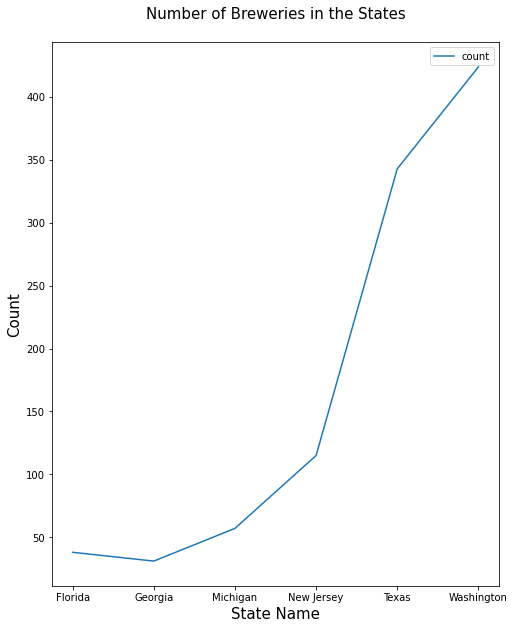

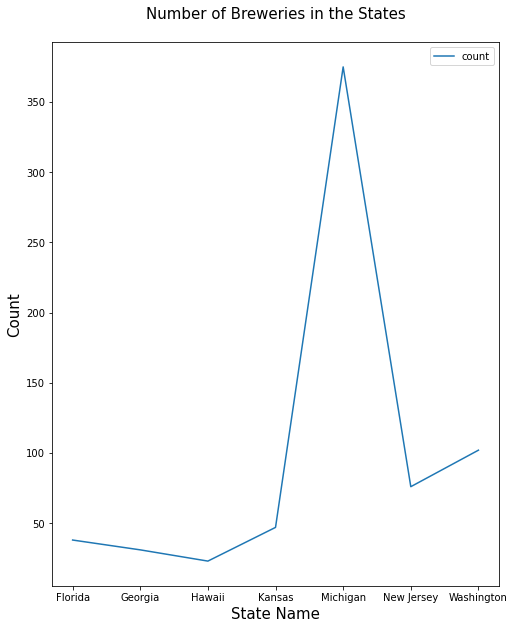

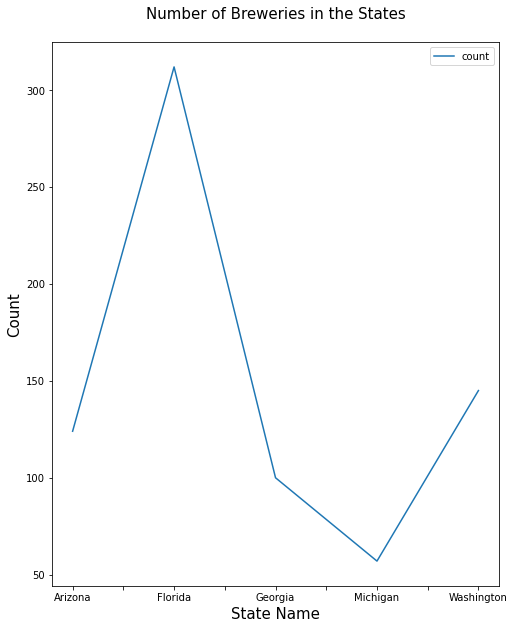

In [10]:
# Call functions to Plot Line graph by passing LINE
graph = 'LINE'
visualize_data(tbl1, tbl2, graph)
visualize_data(tbl2, tbl3, graph)
visualize_data(tbl3, tbl1, graph)

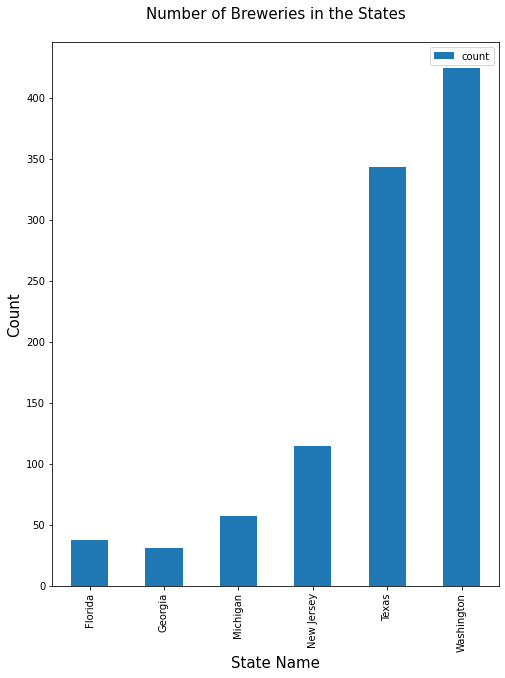

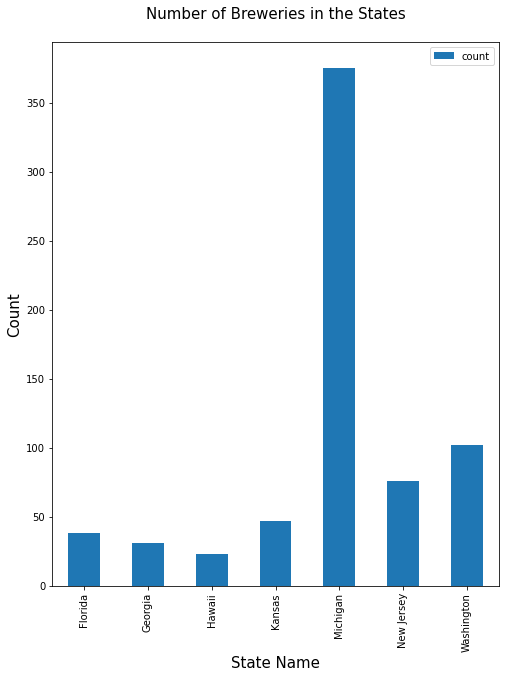

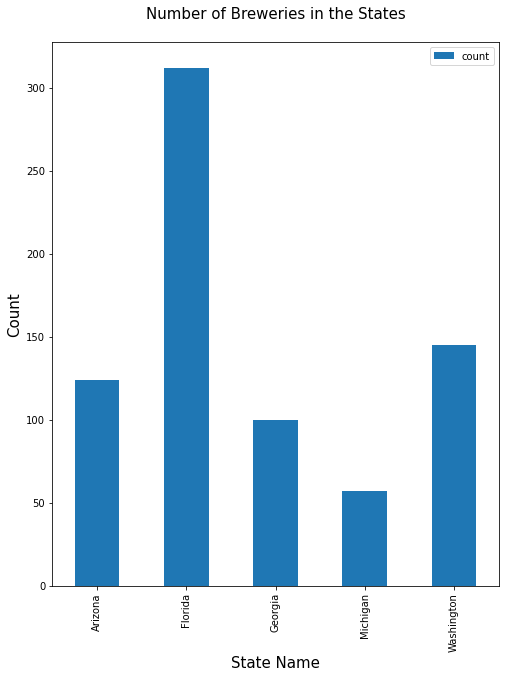

In [11]:
# Call functions to Plot Bar graph by passing BAR
graph = 'BAR'
visualize_data(tbl1, tbl2, graph)
visualize_data(tbl2, tbl3, graph)
visualize_data(tbl3, tbl1, graph)

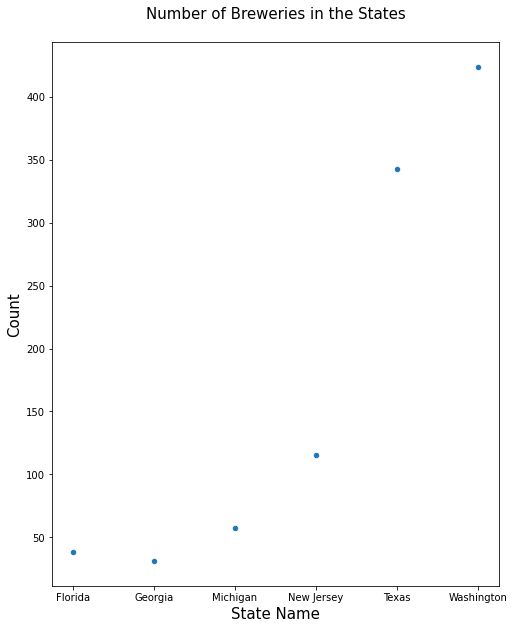

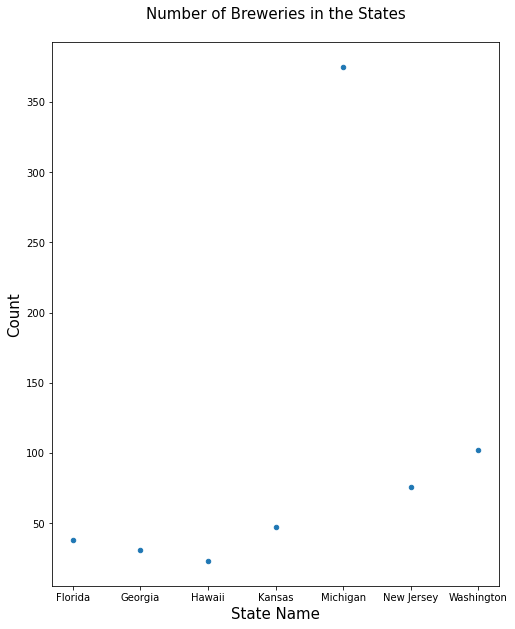

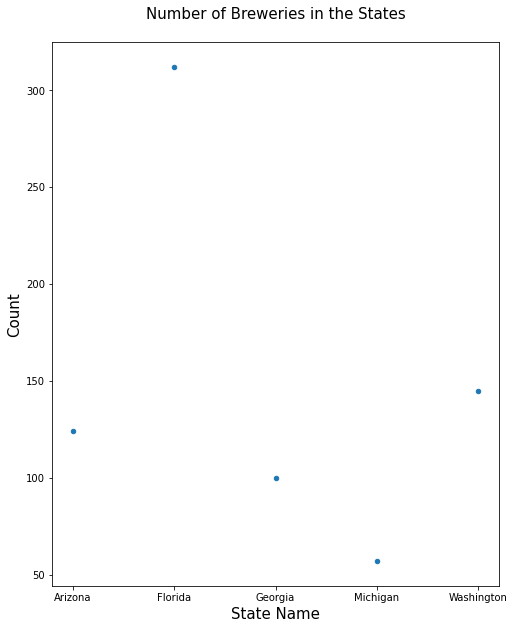

In [12]:
# Call functions to Plot Scatter Plot graph by passing SCATPLT
graph = 'SCATPLT'
visualize_data(tbl1, tbl2, graph)
visualize_data(tbl2, tbl3, graph)
visualize_data(tbl3, tbl1, graph)

In [13]:
# Dropping the tables once the plots are completed
data=c.execute('''drop table milestone2_CSV_data''')
data=c.execute('''drop table milestone3_WEB_data''')
data=c.execute('''drop table milestone4_API_data''')